# Data Wrangling - Players Clustering

In [225]:
#dependências do projeto

%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [226]:
df = pd.read_csv('players_info_cleaned.csv', sep=',')


#mostrar todas as colunas quando printar o dataframe
pd.options.display.max_columns = None

In [227]:
df.shape

(186, 169)

In [228]:
df['match_time'] = df['match_time.1']

## Clusterização

In [229]:
def getKValue(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(df)
        distortions.append(km.inertia_)

    # plot
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [230]:
#K means Clustering 
def doKmeans(df, nclust):
    model = KMeans(nclust)
    model.fit(df)
    clust_labels = model.predict(df)
    cent = model.cluster_centers_
    return (clust_labels, cent)

### Level do Torneio

In [231]:
df_level = df[['atp_250','atp_500','davis_cup','grand_slam','tour_finals','masters','olympics']]


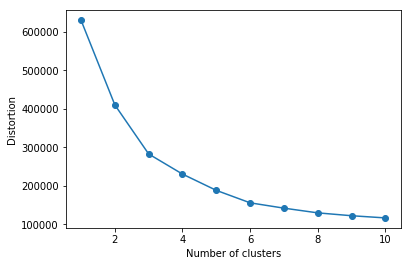

In [232]:
getKValue(df_level)

In [233]:
df_level['labels'], cents = doKmeans(df_level, 3)
df['cluster_level'] = df_level['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


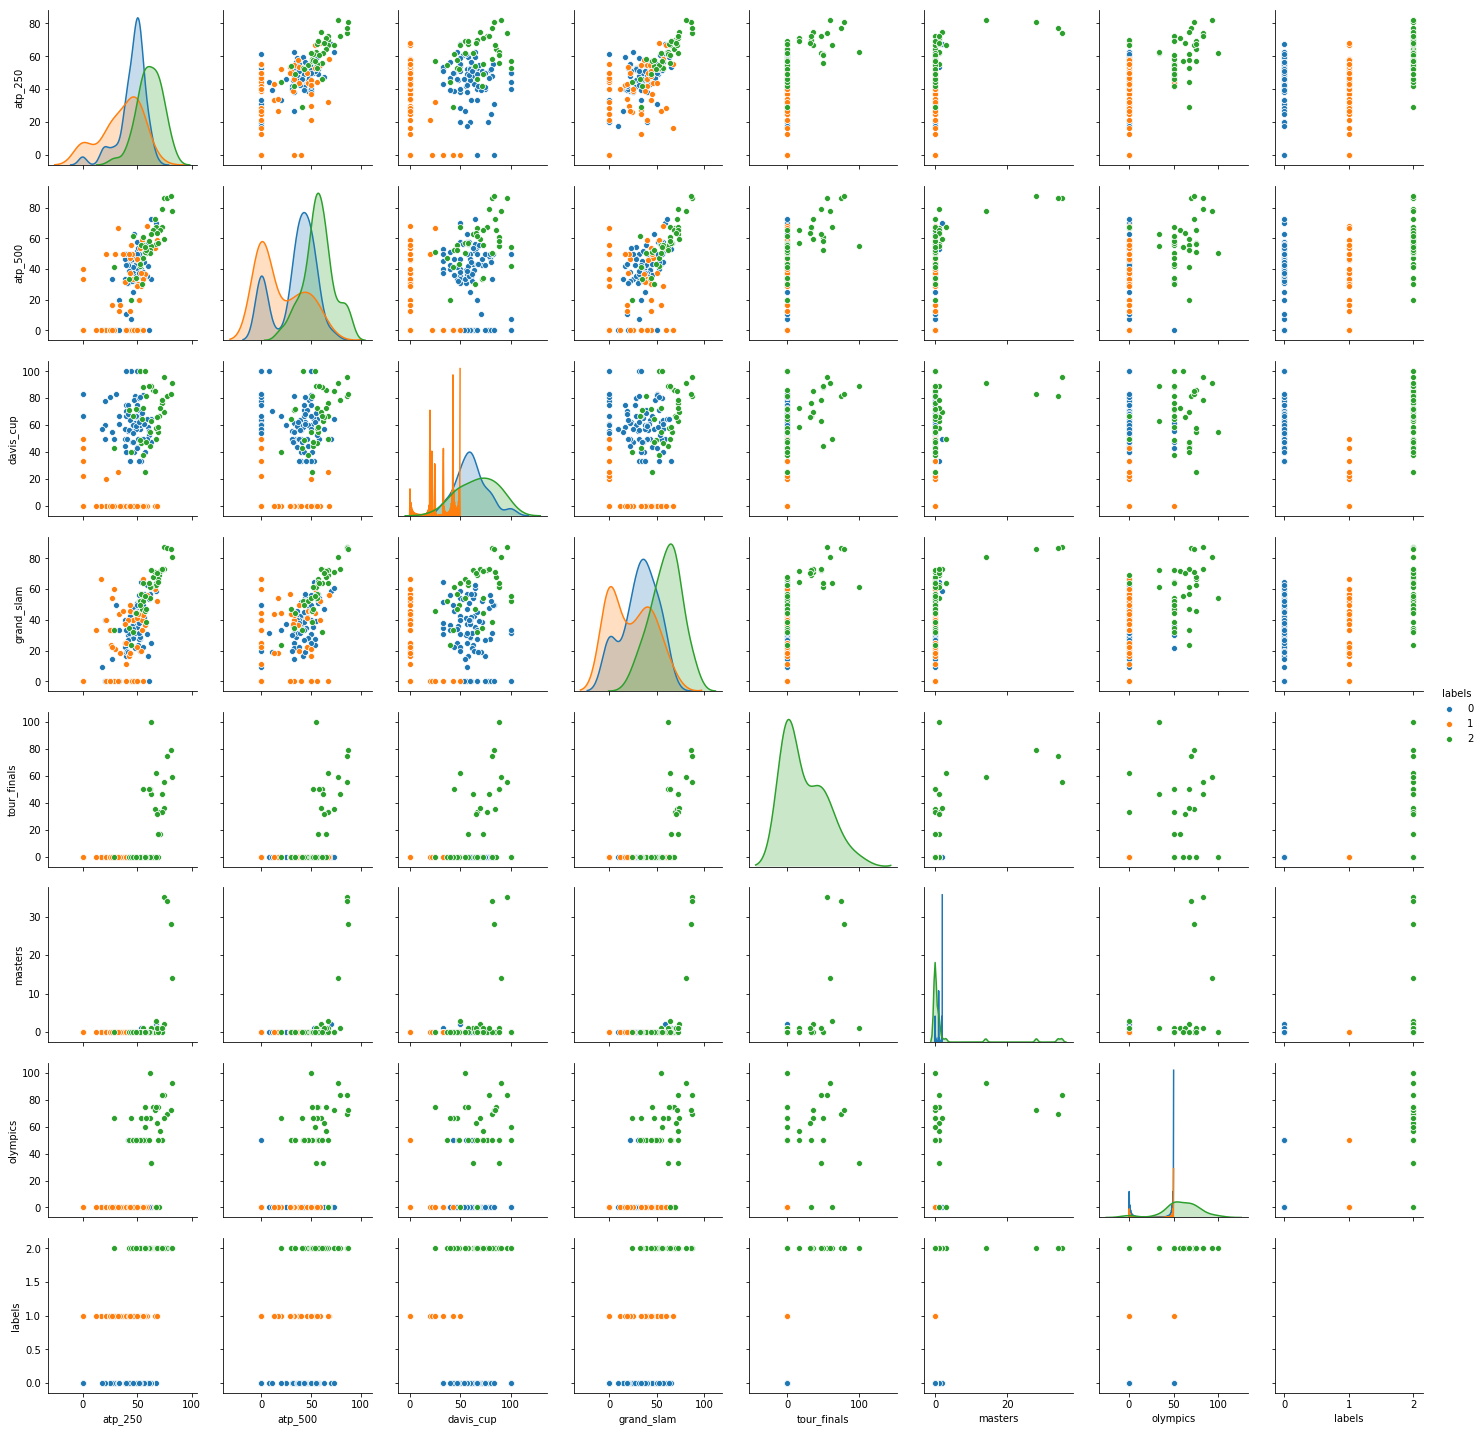

In [234]:
# Create the default pairplot
sns.pairplot(df_level, hue='labels')

### Tipo de Piso

In [235]:
df_piso = df[['hard','clay','grass']]

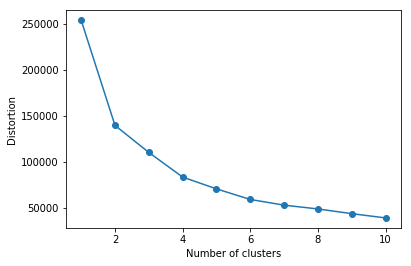

In [236]:
getKValue(df_piso)

In [237]:
df_piso['labels'], cents = doKmeans(df_piso, 4)
df['cluster_piso'] = df_piso['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Situação de Pressão

In [238]:
df_pressao = df[['deciding_set','fifth_set','after_losing_1st_set','after_winning_1st_set','deciding_set_tie_breaks','tie_breaks']]


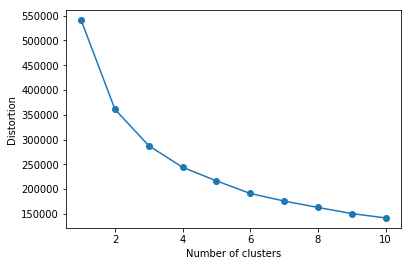

In [239]:
getKValue(df_pressao)

In [240]:
df_pressao['labels'], cents = doKmeans(df_pressao, 3)
df['cluster_pressao'] = df_pressao['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Saque

In [241]:
df_saque = df[['ace_%','aces_per_svc._game', 'aces_per_set', 'aces_per_match','aces_/_dfs_ratio']]

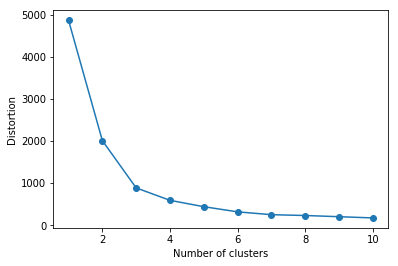

In [242]:
getKValue(df_saque)

In [243]:
df_saque['labels'], cents = doKmeans(df_saque, 3)
df['cluster_saque'] = df_saque['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Dupla Falta


In [244]:
df_duplafalta = df[['double_fault_%','dfs_per_2nd_serve_%','dfs_per_match','dfs_per_set','dfs_per_svc._game']]


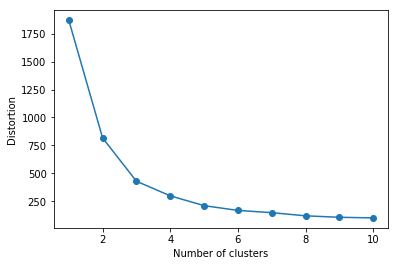

In [245]:
getKValue(df_duplafalta)

In [246]:
df_duplafalta['labels'], cents = doKmeans(df_duplafalta, 3)
df['cluster_duplafalta'] = df_duplafalta['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Game de Serviço

In [247]:
df_servico = df[['1st_serve_%','1st_serve_won_%','2nd_serve_won_%','service_points_won_%','points_per_service_game','pts._lost_per_svc._game',
                    'service_games_won_%','svc._gms._lost_per_match','svc._gms._lost_per_set']]


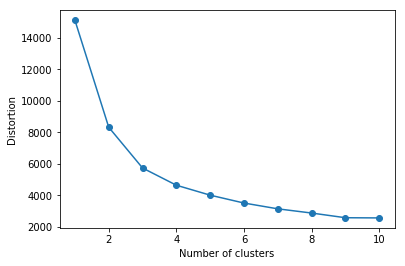

In [248]:
getKValue(df_servico)

In [249]:
df_servico['labels'], cents = doKmeans(df_servico, 3)
df['cluster_servico'] = df_servico['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Game de Retorno

In [250]:
df_gameretorno= df[['1st_srv._return_won_%','2nd_srv._return_won_%','points_per_return_game','pts._won_per_rtn._game','return_games_won_%',
                    'return_points_won_%','rtn._gms._won_per_match','rtn._gms._won_per_set','ace_against_%','double_fault_against_%']]


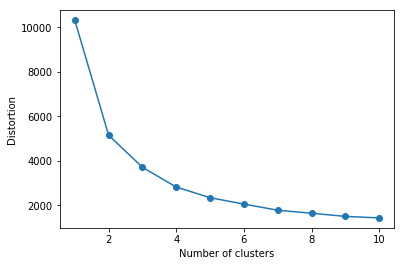

In [251]:
getKValue(df_gameretorno)

In [252]:
df_gameretorno['labels'], cents = doKmeans(df_gameretorno, 3)
df['cluster_retorno'] = df_gameretorno['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Break Points Contra

In [253]:
df_bp_contra = df[['bps_faced_per_match','bps_faced_per_set','bps_per_svc._game','break_points_saved_%']]

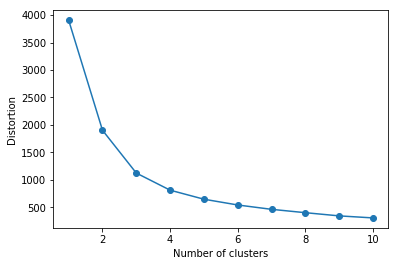

In [254]:
getKValue(df_bp_contra)

In [255]:
df_bp_contra['labels'], cents = doKmeans(df_bp_contra, 3)
df['cluster_bpcontra'] = df_bp_contra['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Break Points a Favor

In [256]:
df_bp_favor = df[['bps_per_match','bps_per_return_game','bps_per_set','break_points_won_%']]


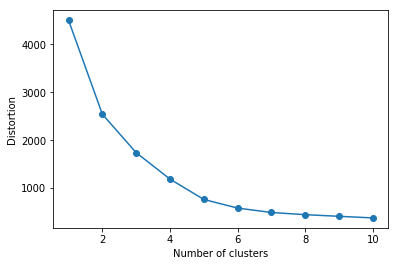

In [257]:
getKValue(df_bp_favor)

In [258]:
df_bp_favor['labels'], cents = doKmeans(df_bp_favor, 3)
df['cluster_bpfavor'] = df_bp_favor['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Pontos

In [259]:
df_pontos = df[['points_per_game','points_per_match','points_per_set','rtn._to_svc._points_ratio','total_points_won_%','point_time']]

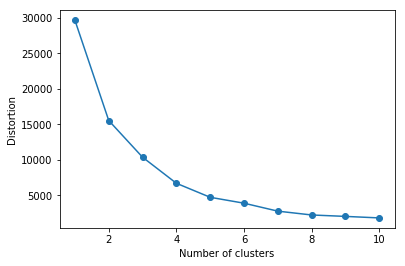

In [260]:
getKValue(df_pontos)

In [261]:
df_pontos['labels'], cents = doKmeans(df_pontos, 4)
df['cluster_pontos'] = df_pontos['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Games

In [262]:
df_game = df[['games_per_match','games_per_set','games_won_%','game_time']]


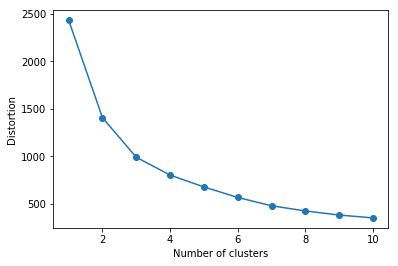

In [263]:
getKValue(df_game)

In [264]:
df_game['labels'], cents = doKmeans(df_game, 3)
df['cluster_game'] = df_game['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Matches

In [265]:
df_match = df[['sets_per_match','sets_won_%','matches_won_%','match_time']]



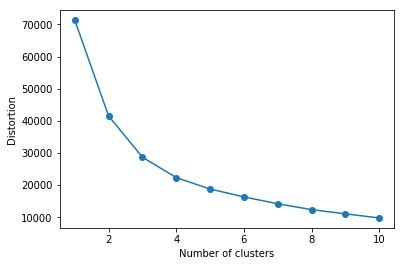

In [266]:
getKValue(df_match)

In [267]:
df_match['labels'], cents = doKmeans(df_match, 4)
df['cluster_match'] = df_match['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Tie Break

In [268]:
df_tiebreak = df[['tie_breaks_per_match','tie_breaks_per_set_%','tie_breaks_won_%']]


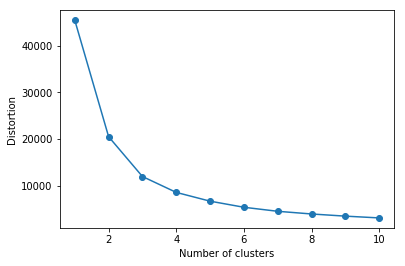

In [269]:
getKValue(df_tiebreak)

In [270]:
df_tiebreak['labels'], cents = doKmeans(df_tiebreak, 3)
df['cluster_tiebreak'] = df_tiebreak['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Upset

In [271]:
df_upset = df[['upsets_%','upsets_against_%','upsets_scored_%']]


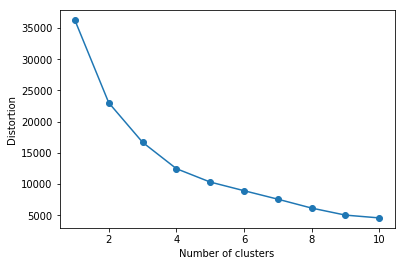

In [272]:
getKValue(df_upset)

In [273]:
df_upset['labels'], cents = doKmeans(df_upset, 4)
df['cluster_upset'] = df_upset['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Dominance

In [274]:
df_dominance = df[['break_points_ratio','games_dominance','points_dominance']]


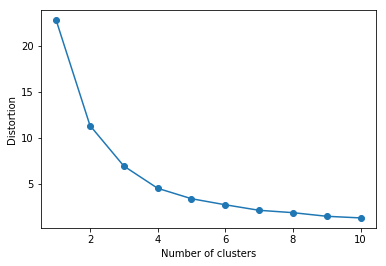

In [275]:
getKValue(df_dominance)

In [276]:
df_dominance['labels'], cents = doKmeans(df_dominance, 3)
df['cluster_dominance'] = df_dominance['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Rodada

In [277]:
df_rodada = df[['round_of_128','round_of_16','round_of_32','round_of_64','finals','quarter_final','semi_final']]


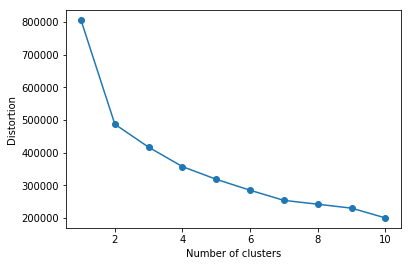

In [278]:
getKValue(df_rodada)

In [279]:
df_rodada['labels'], cents = doKmeans(df_rodada, 3)
df['cluster_rodada'] = df_rodada['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Velocidade

In [280]:
df_velocidade = df[['medium','medium_fast','medium_slow','very_fast','very_slow','slow','fast']]


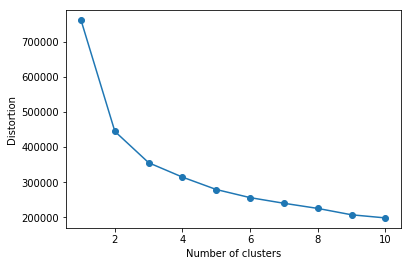

In [281]:
getKValue(df_velocidade)

In [282]:
df_velocidade['labels'], cents = doKmeans(df_velocidade, 3)
df['cluster_velocidade'] = df_velocidade['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Oponente

In [283]:
df_oponente = df[['vs_no._1','vs_top_10','vs_top_100','vs_top_20','vs_top_5','vs_top_50']]


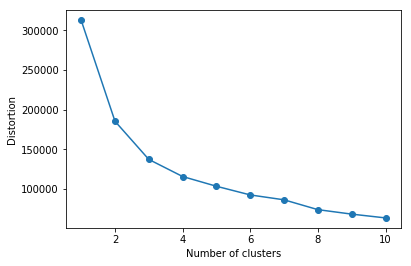

In [284]:
getKValue(df_oponente)

In [285]:
df_oponente['labels'], cents = doKmeans(df_oponente, 3)
df['cluster_oponente'] = df_oponente['labels']

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [286]:
df.head()

,player_id,player_name,age,country,favorite_hand,backhand,turned_pro,prize_money,titles,grand_slams,masters,finals,current_rank,best_rank,hard,clay,grass,grand_slam,tour_finals,masters.1,olympics,atp_500,atp_250,davis_cup,deciding_set,fifth_set,after_winning_1st_set,after_losing_1st_set,tie_breaks,deciding_set_tie_breaks,outdoor,indoor,best_of_3,best_of_5,vs_no._1,vs_top_5,vs_top_10,vs_top_20,vs_top_50,vs_top_100,final,for_bronze_medal,semi_final,quarter_final,round_of_16,round_of_32,round_of_64,round_of_128,very_fast,fast,medium_fast,medium,medium_slow,slow,very_slow,win,final.1,semi_final.1,quarter_final.1,round_of_16.1,round_of_32.1,round_of_64.1,round_of_128.1,ace_%,double_fault_%,1st_serve_%,1st_serve_won_%,2nd_serve_won_%,break_points_saved_%,service_points_won_%,service_games_won_%,ace_against_%,double_fault_against_%,1st_srv._return_won_%,2nd_srv._return_won_%,break_points_won_%,return_points_won_%,return_games_won_%,points_dominance,games_dominance,break_points_ratio,total_points_won_%,games_won_%,sets_won_%,matches_won_%,match_time,ace_%.1,aces_per_svc._game,aces_per_set,aces_per_match,double_fault_%.1,dfs_per_2nd_serve_%,dfs_per_svc._game,dfs_per_set,dfs_per_match,aces_/_dfs_ratio,ace_against_%.1,double_fault_against_%.1,1st_serve_%.1,1st_serve_won_%.1,2nd_serve_won_%.1,1st_serve_effectiveness,serve_rating,service_points_won_%.1,svc._in_play_pts._won_%,points_per_service_game,pts._lost_per_svc._game,break_points_saved_%.1,bps_per_svc._game,bps_faced_per_set,bps_faced_per_match,service_games_won_%.1,svc._gms._lost_per_set,svc._gms._lost_per_match,1st_srv._return_won_%.1,2nd_srv._return_won_%.1,return_rating,return_points_won_%.1,rtn._in_play_pts._won_%,points_per_return_game,pts._won_per_rtn._game,break_points_won_%.1,bps_per_return_game,bps_per_set,bps_per_match,return_games_won_%.1,rtn._gms._won_per_set,rtn._gms._won_per_match,total_points_won_%.1,tot._2nd_srv._in_pl._pts._w._%,rtn._to_svc._points_ratio,points_per_game,points_per_set,points_per_match,games_won_%.1,games_per_set,games_per_match,tie_breaks_won_%,tie_breaks_per_set_%,tie_breaks_per_match,sets_won_%.1,sets_per_match,matches_won_%.1,points_dominance.1,in_play_points_dominance,2nd_srv._in_play_pts._dom.,games_dominance.1,break_points_ratio.1,pts._to_matches_over_perf.,pts._to_sets_over_perf.,pts._to_gms._over_perf.,s._pts._to_s._gms._ov._perf.,r._pts._to_r._gms._ov._perf.,pts._to_tbs._over_perf.,gms._to_matches_ov._perf.,gms._to_sets_over_perf.,sets_to_matches_ov._perf.,bps_over_performing,bps_saved_over_perf.,bps_conv._over_perf.,opponent_rank,opponent_elo_rating,upsets_scored_%,upsets_against_%,upsets_%,point_time,game_time,set_time,match_time.1,cluster_level,cluster_piso,cluster_pressao,cluster_saque,cluster_duplafalta,cluster_servico,cluster_retorno,cluster_bpcontra,cluster_bpfavor,cluster_pontos,cluster_game,cluster_match,cluster_tiebreak,cluster_upset,cluster_dominance,cluster_rodada,cluster_velocidade,cluster_oponente
0,4742,Rafael Nadal,33,Spain,Left-handed,Two-handed,2001,115178858,84,19,35,0,1,1,77.9,91.8,78.0,87.7,55.2,82.9,83.3,86.5,74.1,96.0,68.5,66.7,95.1,42.6,61.2,51.4,84.9,66.4,81.1,88.3,52.6,60.0,65.5,71.7,77.9,82.3,69.4,0.0,74.8,77.7,89.0,89.8,89.0,96.6,74.9,75.5,78.8,85.8,89.2,91.5,95.8,30.2,69.4,74.8,77.7,89.0,89.8,89.0,96.6,4.1,2.2,68.4,72.0,57.4,66.4,67.4,85.8,7.3,3.4,34.3,55.3,44.9,42.5,33.5,1.30,2.35,1.34,54.5,59.9,77.6,83.2,113,4.1,0.25,1.19,3.0,2.2,6.9,0.13,0.63,1.6,1.89,7.3,3.4,68.4,72.0,57.4,1.25,352,67.4,67.5,6.11,1.99,66.4,0.42,1.98,5.0,85.8,0.67,1.7,34.3,55.3,168,42.5,43.7,6.57,2.79,44.9,0.74,3.46,8.8,33.5,1.56,4.0,54.5,55.7,1.07,6.34,59.2,150.4,59.9,9.32,23.8,61.2,12.9,0.33,77.6,2.56,83.2,1.30,1.35,1.33,2.35,1.34,1.53,1.42,1.10,1.27,0.79,1.12,1.39,1.30,1.07,0.97,0.99,1.06,27,2021,4.7,12.6,17.3,0.751667,4.77,44.5,113,2,1,0,0,0,1,1,2,2,0,2,2,0,0,2,2,0,2
1,4920,Novak Djokovic,32,Serbia,Right-handed,Two-handed,2003,135259120,77,16,34,5,2,1,84.2,79.6,84.1,86.7,74.5,81.8,69.2,86.3,77.2,81.6,73.0,75.0,95.9,41.9,64.3,72.7,83.8,77.

In [290]:
new_df = df[['player_id', 'player_name', 'age', 'country', 'favorite_hand', 'backhand', 'turned_pro', 'prize_money', 'titles', 'cluster_level', 'cluster_piso', 'cluster_pressao',
  'cluster_saque', 'cluster_duplafalta', 'cluster_servico', 'cluster_retorno', 'cluster_bpcontra', 'cluster_bpfavor', 'cluster_pontos', 'cluster_game', 'cluster_match', 'cluster_tiebreak',
  'cluster_upset', 'cluster_dominance', 'cluster_rodada', 'cluster_velocidade', 'cluster_oponente']]

## Save Dataset

In [291]:
new_df.to_csv('players_info_clustezition.csv', encoding='utf-8', index=False)